In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize']=(8,5)
sns.set()
sns.set(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Dataset Description

This dataset is a collection of information about used cars, designed to help predict how much a car might sell for.
It includes details like the car's name, the year it was made, how many kilometers it has been driven, and what kind of fuel and transmission it uses. It also notes how many previous owners the car has had and its current market value.
The dataset is well-suited for this task, where we need to estimate or predict a car's selling price based on these features.

**This dataset contains several key details about used cars:**

- **Car_Name**: The name or model of the car.
- **Year**: The year the car was manufactured.
- **Selling_Price**: The price at which the car was sold or is being sold (the main value we're trying to predict).
- **Present_Price**: The car's current market value.
- **Driven_kms**: The total distance the car has been driven, measured in kilometers.
- **Fuel_Type**: The type of fuel the car uses, such as petrol or diesel.
- **Selling_type**: The method or category of sale.
- **Transmission**: Whether the car has a manual or automatic transmission.
- **Owner**: The number of people who have owned the car before.

## Cleaning And Understanding Data

In [7]:
car_pred = pd.read_csv("car data.csv")

In [8]:
car_pred

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
car_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
car_pred.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
car_pred.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
car_pred.shape

(301, 9)

## Visualizing Data Distribution:

**1. Histogram**
- **Purpose**: To see how numerical features are distributed.
- **Columns**: Year, Present_Price, Driven_kms, Selling_Price.
- **Why**? 
     - *Year*: Helps visualize the distribution of car manufacturing years to see the concentration of cars by age.
     - *Present_Price*: Reveals the spread of current prices for the cars, identifying the range and central tendency.
     - *Driven_kms*: Displays the distribution of kilometers driven, indicating how much the cars have been used.
     - *Selling_Price*: Shows the distribution of selling prices, helping to understand pricing trends..

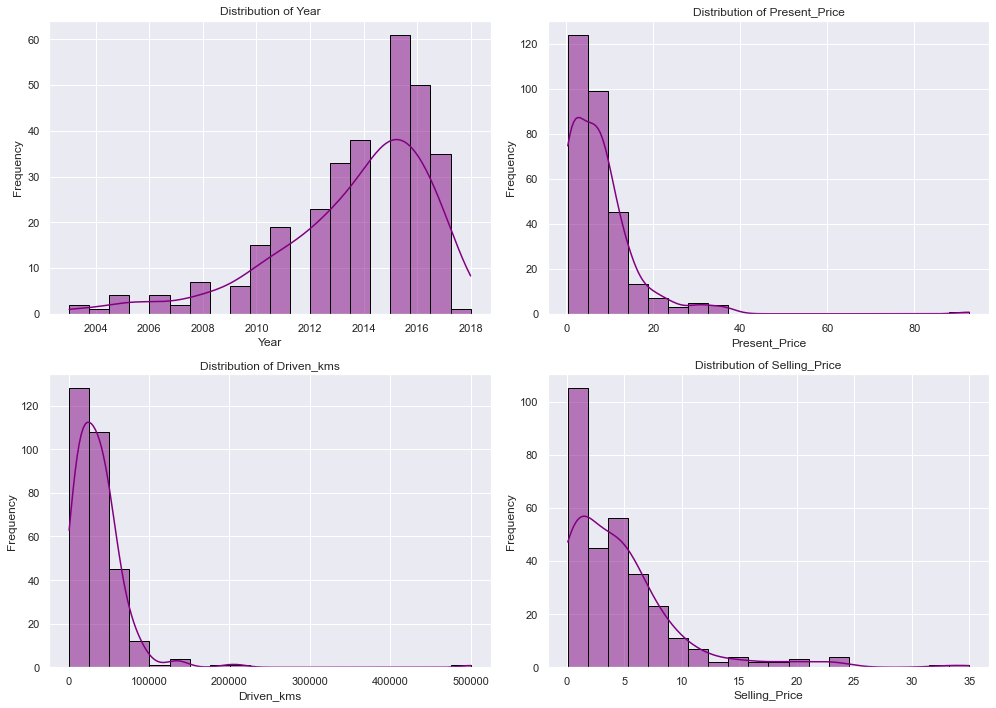

In [13]:
#plotting the histogram for each features 
features = ["Year","Present_Price","Driven_kms","Selling_Price"]
plt.figure(figsize=(14,10))
for i, feature in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(car_pred[feature],bins =20,color="purple",cbar=True,kde=True,edgecolor="black")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

1. **Recent Cars Dominate**: The dataset mainly consists of newer cars, particularly those from around 2015-2016. Older cars, especially those made before 2008, are rare, which contributes to a right-skewed distribution in the year data.

2. **Lower Prices Are Common**: Most cars in the dataset are priced on the lower end, leading to a right-skewed price distribution. While there are a few expensive cars, they are not common.

3. **Lower Mileage Is Typical**: The majority of cars have been driven less than 100,000 kilometers. This results in a right-skewed distribution for driven kilometers, with only a few cars having high mileage.

4. **Lower Selling Prices**: Most cars are sold at lower prices, creating a right-skewed distribution in selling prices. High selling prices are uncommon, which shows that most cars do not fetch very high prices when sold.

**Overall, the data shows a trend where the majority of cars are newer, have lower prices and mileage, and sell for lower amounts. The right-skewed distributions across these variables suggest that there are a few outliers (e.g., older cars, high prices, or high mileage) but they are not typical.**

## Transforming Features with Logarithm to Improve Distribution/Feature Engineering 

In [14]:
car_pred['log_Present_Price'] = np.log(car_pred['Present_Price'] + 1)
car_pred['log_Driven_kms'] = np.log(car_pred['Driven_kms'] + 1)
car_pred['log_Selling_Price'] = np.log(car_pred['Selling_Price'] + 1)

In [15]:
car_pred

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.885553,10.203629,1.470176
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2.355178,10.668979,1.749200
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.384165,8.839422,2.110213
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.638997,8.556606,1.348073
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.063058,10.656106,1.722767
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.533697,10.433792,2.351375
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.931521,11.002117,1.609438
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2.484907,11.384353,1.470176
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2.602690,9.105091,2.525729


## Creating Car Age Column from Year of Manufacture/ Feature Engineering

In [16]:
from datetime import datetime

current_year = datetime.now().year

# Calculate the age of the car
car_pred['Car_Age'] = current_year - car_pred['Year']
car_pred

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.885553,10.203629,1.470176,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2.355178,10.668979,1.749200,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.384165,8.839422,2.110213,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.638997,8.556606,1.348073,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.063058,10.656106,1.722767,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.533697,10.433792,2.351375,8
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.931521,11.002117,1.609438,9
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2.484907,11.384353,1.470176,15
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2.602690,9.105091,2.525729,7


### 2. *Box Plot*
   - *Purpose*: To detect outliers and understand the distribution of a numerical feature across categories.
   - *Columns*: 
     - **Year vs. Selling_Price and the log_Selling_Price **: To see how car age affects selling price.
     - **Fuel_Type vs. Selling_Price and the log_Selling_Price**: To compare selling prices across different fuel types.
     - **Transmission vs. Selling_Price and the log_Selling_Price**: To compare selling prices between manual and automatic transmissions.
     - **Owner vs. Selling_Price and the log_Selling_Price**: To observe how the number of previous owners affects selling price.
   - *Why?*: Helps understand how different categories affect the target variable.


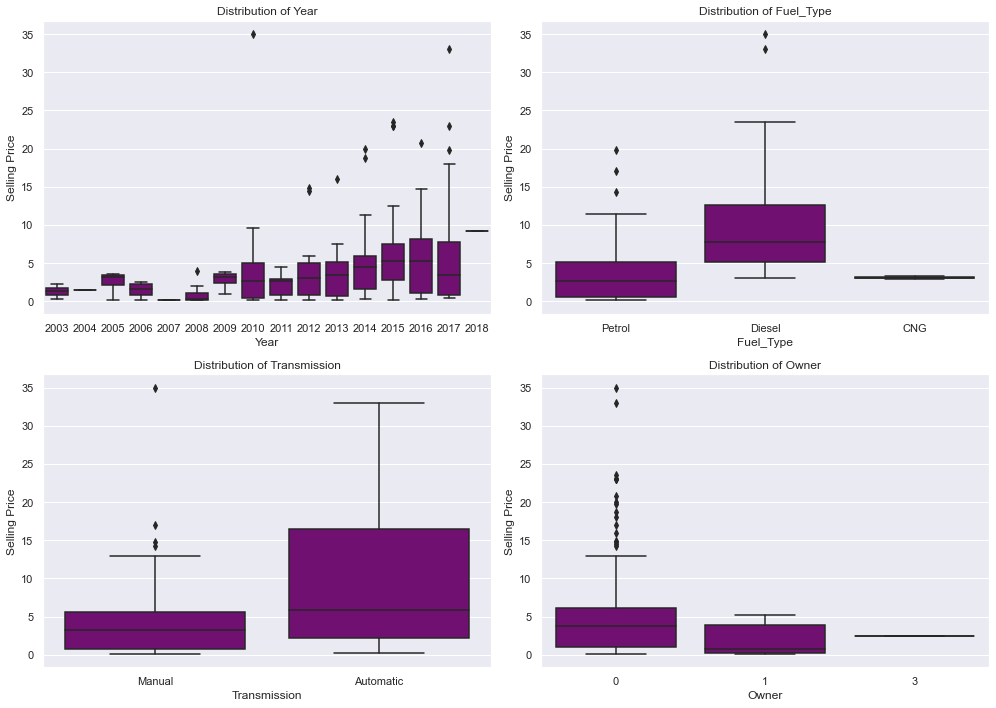

In [17]:
#plotting the Boxplot for each features 
features = ["Year","Fuel_Type","Transmission","Owner"]
plt.figure(figsize=(14,10))
for i, feature in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.boxplot(car_pred[feature],car_pred["Selling_Price"],color="purple")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

1. **Newer Cars Sell for More**: Cars that are newer, especially those made closer to 2018, tend to sell for higher prices. As cars get older (before 2010), their selling prices drop. Some cars, even within the same year, sell for much higher prices than others, but these cases are rare.

2. **Diesel Cars Are Pricier**: Diesel cars generally have higher selling prices than Petrol or CNG cars. Petrol cars have a smaller range in price, while CNG cars are the cheapest and their prices don’t vary much.

3. **Automatic Cars Fetch Higher Prices**: Automatic cars usually sell for more than Manual cars. There’s a bigger difference in the selling prices of Automatic cars, meaning some are much more expensive than others. Manual cars, on the other hand, have a few that sell for higher prices, but this is not common.

4. **Fewer Previous Owners, Higher Price**: Cars that have had no previous owners usually sell for higher prices. The more previous owners a car has, the less it tends to sell for. Cars with 3 previous owners are the cheapest.

**In summary, newer cars, diesel engines, automatic transmissions, and fewer previous owners are all factors that generally lead to higher selling prices. However, there are some exceptions where certain cars sell for much more than others in the same category, but these are uncommon.**

## Fixing/Handling the outliers in the Selling price

In [18]:
# Handling outliers by removing them based on IQR

def handle_outliers_iqr(car_pred, column):
    Q1 = car_pred[column].quantile(0.25)
    Q3 = car_pred[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return car_pred[(car_pred[column] >= lower_bound) & (car_pred[column] <= upper_bound)]

# Applying the outlier removal for 'Selling_Price'
car_pred_no_outliers = handle_outliers_iqr(car_pred, 'Selling_Price')
# Renaming the dataset
car_set = car_pred_no_outliers
car_set

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.885553,10.203629,1.470176,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2.355178,10.668979,1.749200,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.384165,8.839422,2.110213,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.638997,8.556606,1.348073,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.063058,10.656106,1.722767,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.533697,10.433792,2.351375,8
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.931521,11.002117,1.609438,9
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2.484907,11.384353,1.470176,15
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2.602690,9.105091,2.525729,7


## Verifying the fixed outliers with Boxplot Visualization"

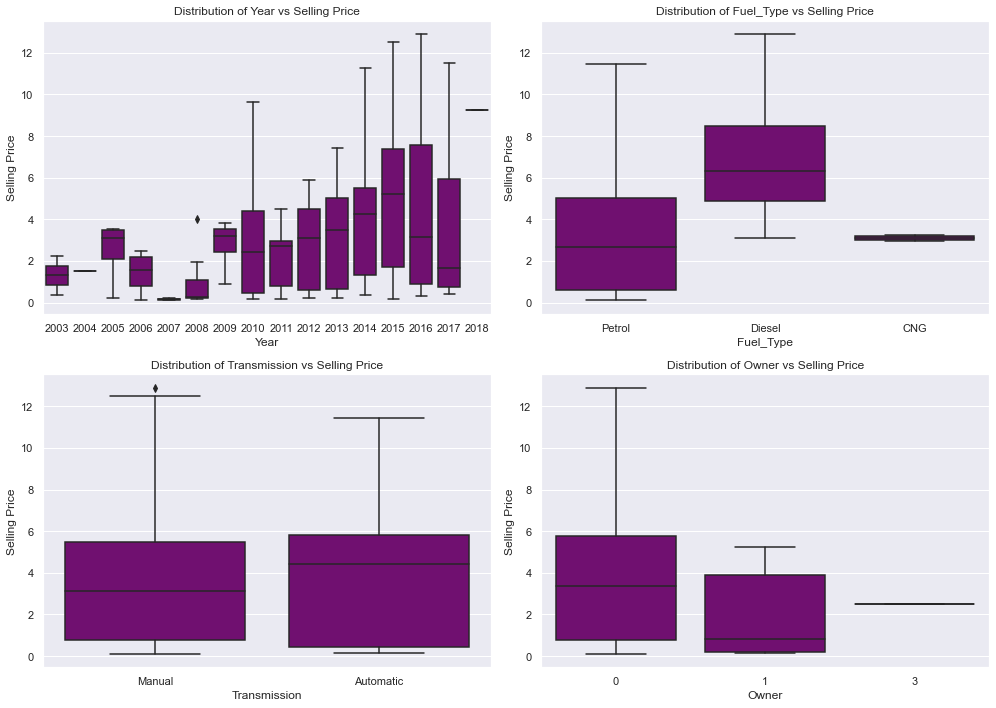

In [19]:
#plotting the histogram for each features 
features = ["Year","Fuel_Type","Transmission","Owner"]
plt.figure(figsize=(14,10))
for i, feature in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.boxplot(car_pred_no_outliers[feature],car_pred_no_outliers["Selling_Price"],color="purple")
    plt.title(f'Distribution of {feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')  
plt.tight_layout()
plt.show()

**After removing the outliers, the data is now more consistent. Without the extreme values, it’s easier to see how the car’s year, fuel type, transmission, and number of previous owners affect the selling price. This makes the prices more even and the dataset better for creating prediction models..**

3. **Scatter Plot**

   - **Purpose**: To examine relationships between two numerical features.
   - **Columns**:
     - **Present_Price vs. Selling_Price**: To understand the relationship between the current market price and the selling price.
     - **Driven_kms vs. Selling_Price**: To see if the distance driven affects the selling price.
   - **Why**: Helps identify correlations and trends between features.

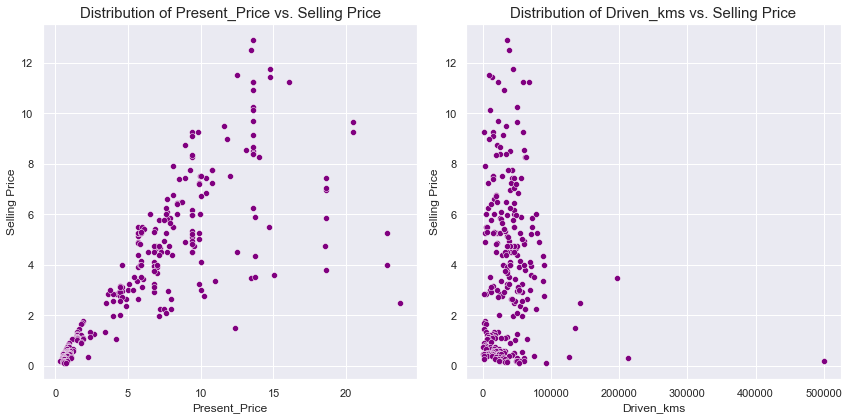

In [20]:
features = ["Present_Price", "Driven_kms"]

# Create a figure for side-by-side subplots
plt.figure(figsize=(12, 6))  # Adjusted the figure size to fit both plots side by side

# Loop through each feature and create a subplot
for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)  # (1, 2, i) creates a 1x2 grid for the plots
    sns.scatterplot(x=car_set[feature], y=car_set["Selling_Price"], color="purple")
    plt.title(f"Distribution of {feature} vs. Selling Price", fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

# Adjust layout
plt.tight_layout()
plt.show()


## Handling outliers for all numerical columns using IQR

In [21]:
def handle_outliers_iqr_all_columns(car_set):
    # Identify numerical columns
    numerical_columns = car_set.select_dtypes(include=['float64', 'int64']).columns
    
    # Iterate over each numerical column to remove outliers
    for column in numerical_columns:
        Q1 = car_set[column].quantile(0.25)
        Q3 = car_set[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        car_set = car_set[(car_set[column] >= lower_bound) & (car_set[column] <= upper_bound)]
    
    return car_set

# Applying the outlier removal for all numerical columns
Car_Set = handle_outliers_iqr_all_columns(car_set)
Car_Set

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.885553,10.203629,1.470176,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2.355178,10.668979,1.749200,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.384165,8.839422,2.110213,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.638997,8.556606,1.348073,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.063058,10.656106,1.722767,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.533697,10.433792,2.351375,8
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.931521,11.002117,1.609438,9
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2.484907,11.384353,1.470176,15
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2.602690,9.105091,2.525729,7


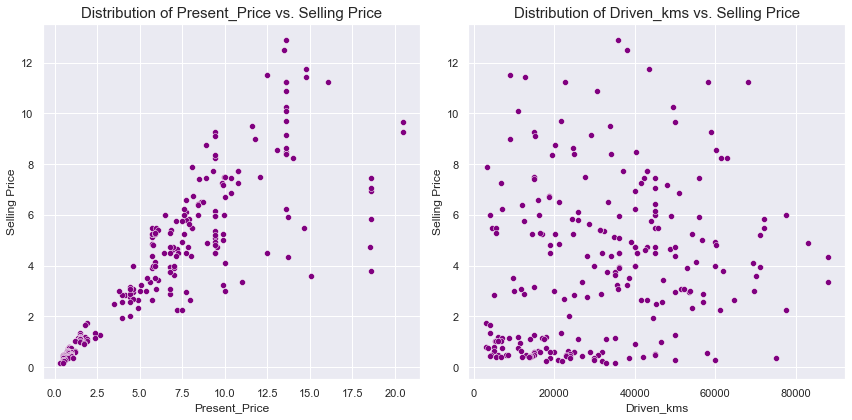

In [22]:
features = ["Present_Price", "Driven_kms"]
plt.figure(figsize=(12, 6))  

# Loop through each feature and create a subplot
for i, feature in enumerate(features, 1):
    plt.subplot(1, 2, i)  
    sns.scatterplot(x=Car_Set[feature], y=Car_Set["Selling_Price"], color="purple")
    plt.title(f"Distribution of {feature} vs. Selling Price", fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

# Adjust layout
plt.tight_layout()
plt.show()

1. **Higher Present Price Means Higher Selling Price**: Cars that are currently worth more tend to sell for more. The connection between the car's current value and its selling price is strong, but as the value gets very high, the increase in selling price slows down.

2. **Kilometers Driven Doesn't Strongly Affect Selling Price**: How far a car has been driven doesn't seem to have a big impact on its selling price. Even though you might think more kilometers would lower the price, the data shows that cars with different mileages can have similar selling prices.

3. **Selling Price Varies More for Lower-Priced Cars**: For cars with lower current prices (below 10), the selling prices vary a lot. This suggests that other factors, like the car's brand, condition, or how in-demand it is, might be influencing the selling price more.

4. **High Mileage, Lower Selling Price Trend**: There's a slight trend where cars that have been driven more (over 60,000 km) tend to sell for less, which makes sense since more usage usually lowers a car's value.

**In summary, a car's current value is the main factor that affects its selling price. While how much it's been driven does matter, it's not as important as expected, and other things probably also play a role in how much a car sells for.**

4. **Bar Plot**

- **Purpose**: To show how often different categories appear in the data.
- **Columns**:
  - **Fuel_Type**: Shows how many cars use each type of fuel.
  - **Transmission**: Shows how many cars have automatic or manual transmission.
  - **Owner**: Shows how many cars have had one or more previous owners.
- **Why**: Helps quickly see the most common categories and any patterns in the data.

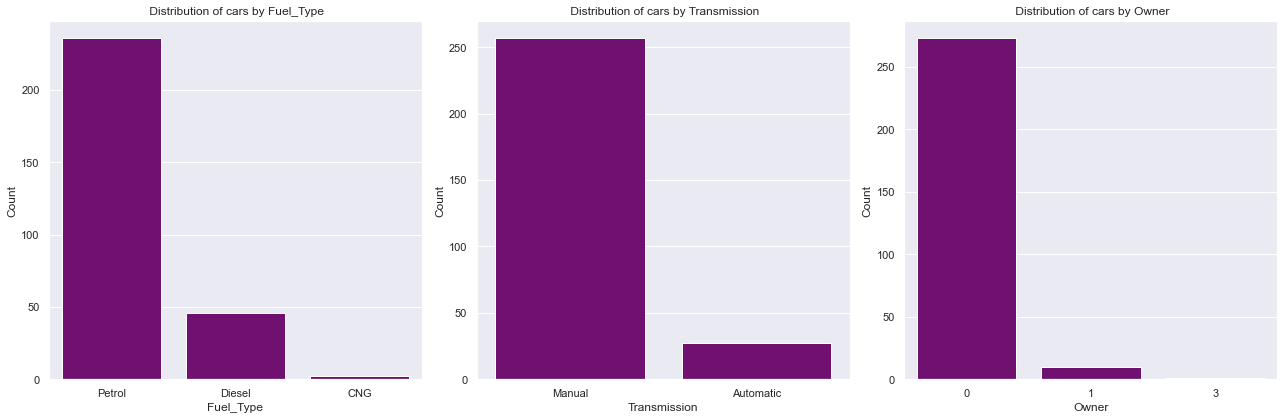

In [23]:
# List of categorical features to plot
features = ["Fuel_Type", "Transmission", "Owner"]

# Create a figure for side-by-side subplots
plt.figure(figsize=(18, 6))

# Loop through each category and create a subplot
for i, category in enumerate(features, 1):
    plt.subplot(1, 3, i) 
    sns.countplot(x=category, data=car_set,color="purple")
    plt.title(f" Distribution of cars by {category}")
    plt.xlabel(category)
    plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


1. **Most Cars Run on Petrol**: The majority of cars use petrol, with fewer using diesel, and very few using CNG.

2. **Manual Transmission is Common**: Most cars have manual transmissions, while automatic ones are less common.

3. **Few Previous Owners**: Most cars haven't had any previous owners, so they're likely new or from the original owner.

### How This Affects the Model:

- **Petrol Cars**: Since petrol cars are the most common, they might have more consistent selling prices. The model can use this to predict the selling price based on fuel type.
  
- **Manual Transmission**: Manual cars could have more predictable prices, making it easier for the model to find patterns. The model might learn that manual cars sell for more or less compared to automatic cars, depending on the market.

- **Number of Previous Owners**: Cars with no previous owners might sell for more, and this can help the model predict higher prices for newer or less-used cars.

These factors can help the model understand patterns and relationships in the data, making it better at predicting selling prices.

## checking if the car name has a strong correlation to the target variable before encoding

In [24]:
# Group by 'Car Name' and calculate the average selling price for each car
car_name_avg_price = car_set.groupby('Car_Name')['Selling_Price'].mean().reset_index()

# Rename the column for clarity
car_name_avg_price.rename(columns={'Selling_Price': 'Avg_Selling_Price'}, inplace=True)

# Merge the average selling price back into the original dataset
car_set_merged = pd.merge(car_set, car_name_avg_price, on='Car_Name', how='left')

# Check the correlation between the actual selling price and the average selling price by car name
correlation = car_set_merged['Selling_Price'].corr(car_set_merged['Avg_Selling_Price'])

print(f"Correlation between 'Car Name' and 'Selling Price': {correlation:.4f}")


Correlation between 'Car Name' and 'Selling Price': 0.9193


**Since the car name has a strong correlation I will be using it in building the model**

## Encoding the categorical variables

In [25]:
Car_Set

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,1.885553,10.203629,1.470176,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2.355178,10.668979,1.749200,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.384165,8.839422,2.110213,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.638997,8.556606,1.348073,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.063058,10.656106,1.722767,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.533697,10.433792,2.351375,8
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.931521,11.002117,1.609438,9
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2.484907,11.384353,1.470176,15
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2.602690,9.105091,2.525729,7


In [26]:
Car_Set["Car_Name"].nunique()

80

In [27]:
le=LabelEncoder()
le

LabelEncoder()

In [28]:
Car_Set["Fuel_Type"]=le.fit_transform(Car_Set["Fuel_Type"])
Car_Set["Car_Name"]=le.fit_transform(Car_Set["Car_Name"])
Car_Set["Selling_type"]=le.fit_transform(Car_Set["Selling_type"])
Car_Set["Transmission"]=le.fit_transform(Car_Set["Transmission"])

## Distribution of Log-Transformed Selling Price: Checking Normality for Target Variable

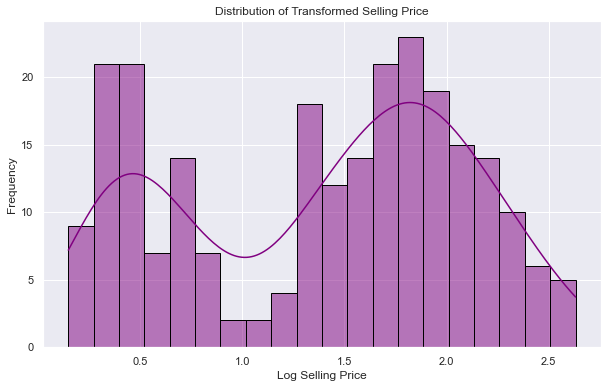

In [29]:
# Plotting the distribution of the ' log Selling Price' variable
plt.figure(figsize=(10, 6))
sns.histplot(Car_Set['log_Selling_Price'], bins=20, kde=True, color='purple',edgecolor="black")
plt.title('Distribution of Transformed Selling Price')
plt.xlabel('Log Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Since it still shows some skewness and isn't perfectly normally distributed, I will use a Box-Cox transformation to make it more normally distributed so that it can be used as the target variable.**

## Box Cox Transformation

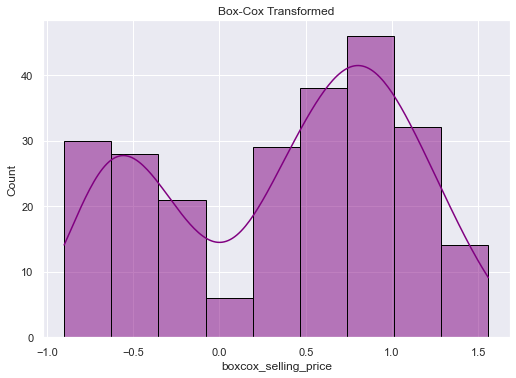

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age,boxcox_selling_price
0,73,2014,3.35,5.59,27000,2,0,1,0,1.885553,10.203629,1.470176,10,0.462363
1,76,2013,4.75,9.54,43000,1,0,1,0,2.355178,10.668979,1.749200,11,0.730744
2,54,2017,7.25,9.85,6900,2,0,1,0,2.384165,8.839422,2.110213,7,1.072871
3,78,2011,2.85,4.15,5200,2,0,1,0,1.638997,8.556606,1.348073,13,0.343641
4,75,2014,4.60,6.87,42450,1,0,1,0,2.063058,10.656106,1.722767,10,0.705478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,55,2016,9.50,11.60,33988,1,0,1,0,2.533697,10.433792,2.351375,8,1.298699
297,53,2015,4.00,5.90,60000,2,0,1,0,1.931521,11.002117,1.609438,9,0.596790
298,55,2009,3.35,11.00,87934,2,0,1,0,2.484907,11.384353,1.470176,15,0.462363
299,55,2017,11.50,12.50,9000,1,0,1,0,2.602690,9.105091,2.525729,7,1.460775


In [30]:
from scipy import stats

boxcox_transformed, _ = stats.boxcox(Car_Set['log_Selling_Price'] + 1e-6)

# Add the transformed data as a new column in the DataFrame
Car_Set['boxcox_selling_price'] = boxcox_transformed


# Plotting the results
plt.figure(figsize=(14, 10))

# Box-Cox Transformed
plt.subplot(2, 2, 3)
sns.histplot(Car_Set['boxcox_selling_price'], kde=True, color='purple',edgecolor="black")
plt.title('Box-Cox Transformed')
plt.tight_layout()
plt.show()
Car_Set

**Since I've tried various transformations and none have fully achieved normality, I'll stick with the Box-Cox transformation for my target variable.**

## Feature Selection With Correlation Method

In [31]:
Car_Set_corr=Car_Set.corr()
Car_Set_corr

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age,boxcox_selling_price
Car_Name,1.000000,-0.095370,0.603617,0.600900,0.345205,-0.339954,-0.826737,-0.024344,NaN,0.762467,0.351948,0.745366,0.095370,0.751965
Year,-0.095370,1.000000,0.216441,-0.113493,-0.513686,0.024297,0.087088,-0.049965,NaN,-0.082701,-0.475931,0.148068,-1.000000,0.143872
Selling_Price,0.603617,0.216441,1.000000,0.863284,0.210976,-0.405854,-0.746713,-0.088969,NaN,0.873175,0.235246,0.954270,-0.216441,0.948569
Present_Price,0.600900,-0.113493,0.863284,1.000000,0.449121,-0.351062,-0.766801,-0.055693,NaN,0.943621,0.426552,0.875053,0.113493,0.872767
Driven_kms,0.345205,-0.513686,0.210976,0.449121,1.000000,-0.350730,-0.426476,0.069049,NaN,0.442382,0.923652,0.280745,0.513686,0.283239
Fuel_Type,-0.339954,0.024297,-0.405854,-0.351062,-0.350730,1.000000,0.327493,-0.135002,NaN,-0.369338,-0.333088,-0.391636,-0.024297,-0.389486
Selling_type,-0.826737,0.087088,-0.746713,-0.766801,-0.426476,0.327493,1.000000,0.042461,NaN,-0.909309,-0.437558,-0.879791,-0.087088,-0.884719
Transmission,-0.024344,-0.049965,-0.088969,-0.055693,0.069049,-0.135002,0.042461,1.000000,NaN,-0.039884,0.045086,-0.064570,0.049965,-0.061755
Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log_Present_Price,0.762467,-0.082701,0.873175,0.943621,0.442382,-0.369338,-0.909309,-0.039884,NaN,1.000000,0.432135,0.953225,0.082701,0.955204


In [32]:
# Fill missing values with the median
Car_Set_filled = Car_Set_corr.fillna(Car_Set_corr.median(numeric_only=True))
Car_Set_filled

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age,boxcox_selling_price
Car_Name,1.000000,-0.095370,0.603617,0.600900,0.345205,-0.339954,-0.826737,-0.024344,NaN,0.762467,0.351948,0.745366,0.095370,0.751965
Year,-0.095370,1.000000,0.216441,-0.113493,-0.513686,0.024297,0.087088,-0.049965,NaN,-0.082701,-0.475931,0.148068,-1.000000,0.143872
Selling_Price,0.603617,0.216441,1.000000,0.863284,0.210976,-0.405854,-0.746713,-0.088969,NaN,0.873175,0.235246,0.954270,-0.216441,0.948569
Present_Price,0.600900,-0.113493,0.863284,1.000000,0.449121,-0.351062,-0.766801,-0.055693,NaN,0.943621,0.426552,0.875053,0.113493,0.872767
Driven_kms,0.345205,-0.513686,0.210976,0.449121,1.000000,-0.350730,-0.426476,0.069049,NaN,0.442382,0.923652,0.280745,0.513686,0.283239
Fuel_Type,-0.339954,0.024297,-0.405854,-0.351062,-0.350730,1.000000,0.327493,-0.135002,NaN,-0.369338,-0.333088,-0.391636,-0.024297,-0.389486
Selling_type,-0.826737,0.087088,-0.746713,-0.766801,-0.426476,0.327493,1.000000,0.042461,NaN,-0.909309,-0.437558,-0.879791,-0.087088,-0.884719
Transmission,-0.024344,-0.049965,-0.088969,-0.055693,0.069049,-0.135002,0.042461,1.000000,NaN,-0.039884,0.045086,-0.064570,0.049965,-0.061755
Owner,0.351948,-0.049965,0.235246,0.449121,0.283239,-0.339954,-0.437558,-0.039884,NaN,0.442382,0.293648,0.292404,0.049965,0.293648
log_Present_Price,0.762467,-0.082701,0.873175,0.943621,0.442382,-0.369338,-0.909309,-0.039884,NaN,1.000000,0.432135,0.953225,0.082701,0.955204


In [33]:
# Drop the 'Owner' column
Car_Set_dropped = Car_Set_filled.drop(columns=['Owner'])

# Display the modified DataFrame
Car_Set_dropped

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age,boxcox_selling_price
Car_Name,1.000000,-0.095370,0.603617,0.600900,0.345205,-0.339954,-0.826737,-0.024344,0.762467,0.351948,0.745366,0.095370,0.751965
Year,-0.095370,1.000000,0.216441,-0.113493,-0.513686,0.024297,0.087088,-0.049965,-0.082701,-0.475931,0.148068,-1.000000,0.143872
Selling_Price,0.603617,0.216441,1.000000,0.863284,0.210976,-0.405854,-0.746713,-0.088969,0.873175,0.235246,0.954270,-0.216441,0.948569
Present_Price,0.600900,-0.113493,0.863284,1.000000,0.449121,-0.351062,-0.766801,-0.055693,0.943621,0.426552,0.875053,0.113493,0.872767
Driven_kms,0.345205,-0.513686,0.210976,0.449121,1.000000,-0.350730,-0.426476,0.069049,0.442382,0.923652,0.280745,0.513686,0.283239
Fuel_Type,-0.339954,0.024297,-0.405854,-0.351062,-0.350730,1.000000,0.327493,-0.135002,-0.369338,-0.333088,-0.391636,-0.024297,-0.389486
Selling_type,-0.826737,0.087088,-0.746713,-0.766801,-0.426476,0.327493,1.000000,0.042461,-0.909309,-0.437558,-0.879791,-0.087088,-0.884719
Transmission,-0.024344,-0.049965,-0.088969,-0.055693,0.069049,-0.135002,0.042461,1.000000,-0.039884,0.045086,-0.064570,0.049965,-0.061755
Owner,0.351948,-0.049965,0.235246,0.449121,0.283239,-0.339954,-0.437558,-0.039884,0.442382,0.293648,0.292404,0.049965,0.293648
log_Present_Price,0.762467,-0.082701,0.873175,0.943621,0.442382,-0.369338,-0.909309,-0.039884,1.000000,0.432135,0.953225,0.082701,0.955204


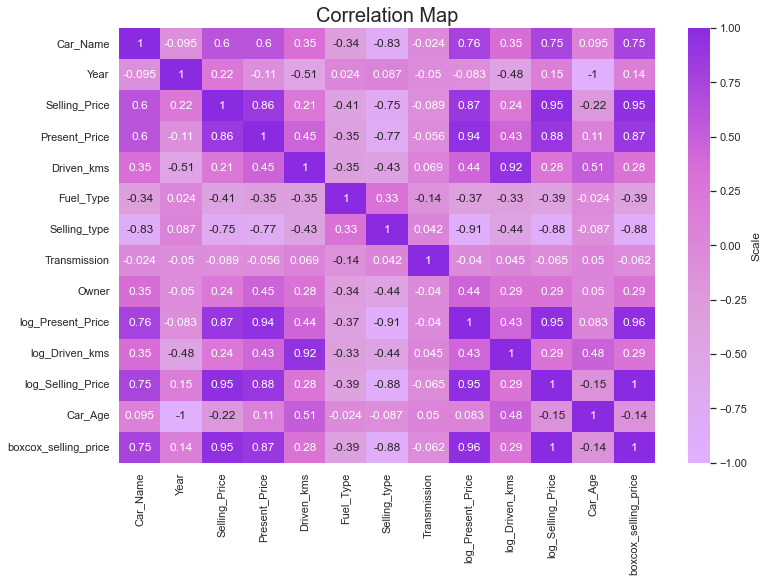

In [34]:
import matplotlib.colors as mcolors

plt.figure(figsize=(12, 8))

# Clear any existing figures
plt.clf()

# Define shades of purple
colors = ["#E0B0FF", "#DDA0DD", "#DA70D6", "#8A2BE2"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_purple_cmap", colors)

# Create the heatmap
sns.heatmap(data=Car_Set_dropped, annot=True, cmap=custom_cmap, cbar_kws={"label": "Scale"})
plt.title("Correlation Map", fontsize=20)
plt.show()

# Clear the figure to prevent further plotting on the same figure
plt.close()


### Target Variable: BoxCox Selling Price

1. **Highly Correlated Features**:
   - **Car_Name (0.75)**: Strong positive correlation. The car's name appears to significantly influence the BoxCox transformed selling price, possibly due to brand reputation. Essential for the model.
   - **Selling_Price (0.95)**: Very strong correlation with BoxCox_Selling_Price. As expected, the original selling price closely relates to its transformed version. Key feature.
   - **Present_Price (0.87)**: Strong positive correlation. Cars with higher current prices tend to have higher BoxCox transformed selling prices. Important for the model.
   - **log_Present_Price (0.96)**: Very strong correlation with BoxCox_Selling_Price. Log transformation effectively reduces skewness and improves linearity. Consider using this version.
   - **log_Selling_Price (1.00)**: Perfect correlation with BoxCox_Selling_Price. Essential if using log transformation for the target variable.

2. **Moderately Correlated Features**:
   - **Driven_kms (0.28)**: Moderate positive correlation. Cars that have been driven more tend to have slightly higher BoxCox transformed selling prices. Important for capturing mileage effects.
   - **log_Driven_kms (0.29)**: Slightly stronger correlation with BoxCox_Selling_Price. Log transformation might help in enhancing model performance.
   - **Owner (0.29)**: Moderate positive correlation. Cars with more previous owners tend to have slightly higher BoxCox transformed selling prices. Include for its influence on selling price.

3. **Less Correlated Features**:
   - **Year (0.14)**: Weak positive correlation. Newer cars have a slight tendency to sell for more in their BoxCox transformed value. Include for its impact on selling price.
   - **Transmission (-0.062)**: Very weak negative correlation. Has little impact on BoxCox_Selling_Price but can be included as a categorical feature.

4. **Least Correlated Features**:
   - **Fuel_Type (-0.39)**: Weak negative correlation. The type of fuel has a small impact on the BoxCox transformed selling price. Consider including it, especially if encoded correctly.
   - **Car_Age (-0.14)**: Weak negative correlation. Older cars have a slight tendency to sell for less. May be included to capture depreciation effects.
   - **Selling_type (-0.88)**: Strong negative correlation. The type of selling influences the BoxCox transformed selling price significantly. Include this feature with careful interpretation.

*I will be focusing on features with high correlations and potential transformations to optimize the model.*

In [35]:
#Splitting The Dependent/Target and Independent variable
X=Car_Set.drop(columns=["boxcox_selling_price"],axis = 1)
X

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age
0,73,2014,3.35,5.59,27000,2,0,1,0,1.885553,10.203629,1.470176,10
1,76,2013,4.75,9.54,43000,1,0,1,0,2.355178,10.668979,1.749200,11
2,54,2017,7.25,9.85,6900,2,0,1,0,2.384165,8.839422,2.110213,7
3,78,2011,2.85,4.15,5200,2,0,1,0,1.638997,8.556606,1.348073,13
4,75,2014,4.60,6.87,42450,1,0,1,0,2.063058,10.656106,1.722767,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,55,2016,9.50,11.60,33988,1,0,1,0,2.533697,10.433792,2.351375,8
297,53,2015,4.00,5.90,60000,2,0,1,0,1.931521,11.002117,1.609438,9
298,55,2009,3.35,11.00,87934,2,0,1,0,2.484907,11.384353,1.470176,15
299,55,2017,11.50,12.50,9000,1,0,1,0,2.602690,9.105091,2.525729,7


In [36]:
# Target variable/Dependent column
y=Car_Set[["boxcox_selling_price"]]  
y

,boxcox_selling_price
0,0.462363
1,0.730744
2,1.072871
3,0.343641
4,0.705478
...,...
296,1.298699
297,0.596790
298,0.462363
299,1.460775


In [37]:
scaler = StandardScaler() 
scaler

StandardScaler()

In [38]:
X_normalize=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_normalize

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,log_Present_Price,log_Driven_kms,log_Selling_Price,Car_Age
0,1.108719,-0.031717,-0.214951,-0.153771,-0.261941,0.464573,-0.704934,0.290593,0.0,0.208510,0.091227,0.112113,0.031717
1,1.259291,-0.515402,0.239679,0.663762,0.563661,-1.947253,-0.704934,0.290593,0.0,0.797309,0.689117,0.511039,0.515402
2,0.155097,1.419339,1.051520,0.727923,-1.299105,0.464573,-0.704934,0.290593,0.0,0.833653,-1.661533,1.027187,-1.419339
3,1.359672,-1.482773,-0.377320,-0.451809,-1.386825,0.464573,-0.704934,0.290593,0.0,-0.100614,-2.024899,-0.062459,1.482773
4,1.209100,-0.031717,0.190969,0.111151,0.535281,-1.947253,-0.704934,0.290593,0.0,0.431060,0.672578,0.473247,0.031717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.205288,0.935654,1.782177,1.090121,0.098641,-1.947253,-0.704934,0.290593,0.0,1.021131,0.386945,1.371981,-0.935654
240,0.104907,0.451968,-0.003873,-0.089611,1.440864,0.464573,-0.704934,0.290593,0.0,0.266143,1.117139,0.311219,-0.451968
241,0.205288,-2.450144,-0.214951,0.965939,2.882263,0.464573,-0.704934,0.290593,0.0,0.959960,1.608244,0.112113,2.450144
242,0.205288,1.419339,2.431649,1.276395,-1.190744,-1.947253,-0.704934,0.290593,0.0,1.107632,-1.320195,1.621258,-1.419339


In [39]:
#Splitting the data into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2,random_state = 42)

In [40]:
#The length of the trained set
len(X_train)

195

In [41]:
#The length of the test set
len(y_train)

195

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)


Random Forest Results:
MAE: 0.01
MSE: 0.00
RMSE: 0.04
R^2 Score: 1.00
------------------------------
Decision Tree Results:
MAE: 0.01
MSE: 0.00
RMSE: 0.01
R^2 Score: 1.00
------------------------------
XGBoost Results:
MAE: 0.01
MSE: 0.00
RMSE: 0.03
R^2 Score: 1.00
------------------------------
KNN Results:
MAE: 0.12
MSE: 0.02
RMSE: 0.16
R^2 Score: 0.96
------------------------------


## Hypaparameter Tuning 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize models
models_param_grid = {
    'Random Forest': (RandomForestRegressor(), param_grid_rf),
    'Decision Tree': (DecisionTreeRegressor(), param_grid_dt),
    'XGBoost': (XGBRegressor(), param_grid_xgb),
    'KNN': (KNeighborsRegressor(), param_grid_knn)
}

# Create custom scorer based on MAE
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform Grid Search
best_models = {}
for name, (model, param_grid) in models_param_grid.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    
    # Evaluate the best model
    y_pred = best_models[name].predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Best Model Results after Hyperparameter Tuning:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)


Random Forest Best Model Results after Hyperparameter Tuning:
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 0.02
MSE: 0.00
RMSE: 0.04
R^2 Score: 1.00
------------------------------
Decision Tree Best Model Results after Hyperparameter Tuning:
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2}
MAE: 0.01
MSE: 0.00
RMSE: 0.02
R^2 Score: 1.00
------------------------------
XGBoost Best Model Results after Hyperparameter Tuning:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
MAE: 0.01
MSE: 0.00
RMSE: 0.03
R^2 Score: 1.00
------------------------------
KNN Best Model Results after Hyperparameter Tuning:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
MAE: 0.08
MSE: 0.01
RMSE: 0.12
R^2 Score: 0.97
------------------------------


After testing, all models except K-Nearest Neighbors (KNN) explained all the data perfectly (R² score of 1.00). But when we look at errors:

- **Decision Tree**: Made the fewest mistakes (RMSE of 0.01) and explained the data perfectly, so it’s the most accurate.
- **Random Forest** and **XGBoost**: Made a few more mistakes (RMSE of 0.03) but still did an excellent job.
- **KNN**: Made more mistakes (RMSE of 0.12) and didn’t explain the data as well (R² score of 0.97).

### **Best Model:**
The **Decision Tree** is the best because it made the fewest mistakes and explained the data perfectly.


## Saving the model

In [46]:
import joblib
joblib.dump(DecisionTreeRegressor(), 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']